# Libraries
In our previous document, we laid the foundational knowledge for using Python in econometrics. We explored Python basics, how to operate within a Jupyter Notebook, and briefly touched on importing modules. In this document, we will take a deeper dive into more advanced topics that are particularly relevant for econometric analyses. These include data manipulation using Pandas, numerical operations with NumPy, Ordinary Least Squares (OLS) estimation, plotting, and Monte Carlo simulations. 

### Libraries for Econometrics

While the Python standard library is powerful, the real strength in Python for econometrics comes from its ecosystem of third-party libraries. We've already seen how to import modules using the import statement, as demonstrated with the math module. In this document, we will focus on three key libraries:

- NumPy - For numerical computations and array manipulations.
- Matplotlib - For data visualisation.
- Pandas - For data manipulation and importing.


To import these libraries, you generally use the following syntax:

In [178]:
# Import the necessary libraries
import numpy as np                 # For mathematical calculations
import matplotlib.pyplot as plt    # For plotting graphs 
import pandas as pd                # For dataframes and data manipulation

While you are able to use any alias you want for the module, it is best practice to use the standard abbreviations.

## NumPy
### Numpy Arrays
NumPy is a Python library that is used for scientific computing and is particularly useful for performing numerical operations and array or matrix manipulations.

Numpy's main object is called an *array*. An array is similar to a list in Python, but imposes additional restrictions on the data type and structure of the data. For example, a list can contain a mixture of data types, such as integers, floats, and strings. An array, on the other hand, can only contain one data type. Ultimately, this restriction allows for faster computation and more efficient memory usage.

We can think of an array as a grid of values, all of the same type, and is indexed by a tuple of non-negative integers. For example, in the code we create a 1-dimensional array. We do this by passing a list to the array() function.

In [179]:
python_list = [1, 2, 3, 4, 5]           # Create a python list
numpy_array = np.array(python_list)     # Create a numpy array from a python list
print(numpy_array)

[1 2 3 4 5]


We can index the array using square brackets `[]`. For example, to access the first element of the array, we use the index 0.

Note that python is zero-indexed, meaning that the first element of an array is at index 0. This is different from other programming languages, such as STATA, which are one-indexed.

In [180]:
# We can index numpy arrays just like python lists
print(numpy_array[0])       # Print the first element
print(numpy_array[0:3])     # Print the first three elements

1
[1 2 3]


Also note that the range of indices is inclusive of the first index and exclusive of the last index.

We can also use negative indices to access elements from the end of the array. For example, to access the last element of the array, we use the index -1. 

In [181]:
print(numpy_array[-1])

5


To create a multi-dimensional array, which can be thought of as a matrix, we pass a list of lists to the `np.array()` function. For example, here's how you would create a two-dimensional array:

In [182]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
numpy_array_2d = np.array(list_of_lists)    # Create a 2d numpy array from a list of lists
print(numpy_array_2d)                       # Print the array
print("Shape: ", numpy_array_2d.shape)      # Print the shape of the array

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape:  (3, 3)


To access elements of a multidimensional array, we use the same syntax as before, but with multiple indices. For example, to access the `4`, we would access the second row and first column of the array.

In [183]:
print(numpy_array_2d[1,0])     # Print element infirst row, second column

4


To get the first row, and then second column:

In [184]:
print(numpy_array_2d[0,:])     # Print all elements in first row
print(numpy_array_2d[:,1])     # Print all elements in second column

[1 2 3]
[2 5 8]


### Operations with Arrays

We can perform mathematical operations on arrays, such as addition, subtraction, multiplication, and division. For example, to add two arrays, we simply use the `+` operator. These operations are performed element-wise, meaning that the operation is performed on each element of the array. 

In [185]:
x = np.array([1,2,3])

print("x = ", x)

print("Scalar Addition", 3 + x)
print("Scalar Subtraction", 3 - x)
print("Scalar Multiplication", 3 * x)
print("Scalar Division", 3 / x)

x =  [1 2 3]
Scalar Addition [4 5 6]
Scalar Subtraction [2 1 0]
Scalar Multiplication [3 6 9]
Scalar Division [3.  1.5 1. ]


We can also perform element-wise operations with two arrays of the same size.

In [186]:
y = np.array([4,5,6])

print("x = ", x)
print("y = ", y)

print("Elementwise Addition", x + y)
print("Elementwise Subtraction", x - y)
print("Elementwise Multiplication", x * y)
print("Elementwise Division", x / y)

x =  [1 2 3]
y =  [4 5 6]
Elementwise Addition [5 7 9]
Elementwise Subtraction [-3 -3 -3]
Elementwise Multiplication [ 4 10 18]
Elementwise Division [0.25 0.4  0.5 ]


### Universal Functions

We will often need to transform data in some way. For example, we may want to take the square root of each element in an array. NumPy provides a number of *universal functions*, or `ufuncs` for short, that perform element-wise operations on data in an array.

Below we create an array of numbers from 0 to 9, and then apply the sine function to each element in the array.

In [187]:
x = np.linspace(0, 9, 10)    # Create an array of 10 evenly spaced numbers between 0 and 9
print(x)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [188]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

Other common `ufuncs` include:

- `np.exp()` - Exponential function
- `np.log()` - Natural logarithm
- `np.abs()` - Absolute value
- `np.sqrt()` - Square root

There are many more `ufuncs` available in NumPy. For a full list, see the [NumPy documentation](https://numpy.org/doc/stable/reference/ufuncs.html).

### Other Useful Functions

Numpy is a very large library, and we have only scratched the surface of what it can do. If you think a function is common, it probably already exists in NumPy.

 However, there are a few other functions that are particularly useful for econometrics.

As we did in the first notebook, we can use `tab` to see all of the functions available in a module.

In [189]:
# Use tab completion to see a list of all the functions available in numpy
x.      # Press tab to see a list of functions

SyntaxError: invalid syntax (2093587158.py, line 2)

In [190]:
np.mean(x)

4.5

In [191]:
np.std(x)

2.8722813232690143

In [192]:
print(f"Min: {np.min(x)}, Max: {np.max(x)}")   # Print the minimum and maximum values using f-strings

Min: 0.0, Max: 9.0


In [193]:
np.reshape(x, (5, 2))    # Reshape the array to a 5x2 matrix
# Note that the reshape function returns a new array, it does not modify the original array

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]])



# Linear Algebra
Numpy also has a number of functions for performing linear algebra operations. 

Firstly, we can use the `np.dot()` function to compute the dot product of two arrays.

In [194]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Dot product ", np.dot(x, y))

Dot product  32


We can also use `@` to compute the dot product (and matrix multiplication) of two arrays.

In [195]:
print("Dot product ", x @ y)

Dot product  32


### Matrix Operations
An $N \times M$ matrix can be thought of as a collection of M N-element vectors stacked side-by-side as columns. In NumPy, a matrix is represented as a two-dimensional array. 

In [196]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

Numpy also has a number of functions for creating common matrices. 

In [197]:
np.zeros((2, 3))    # Create a 2x3 array of zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [198]:
np.ones((4, 2))     # Create a 4x2 array of ones

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [199]:
np.eye(3)           # Create a 3x3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Matrix Multiplication

There are three ways to perform matrix multiplication in NumPy. Remember that to perform matrix multiplication, the number of columns in the first matrix must equal the number of rows in the second matrix.

In [200]:
x1 = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
x2 = np.array([[2, 5, 2], [1, 2, 1]])

print("Using the matmul function for two matrices")
print(np.matmul(x1, x2))
print("Using the dot function for two matrices")
print(np.dot(x1, x2))
print("Using @ for two matrices")
print(x1 @ x2)

Using the matmul function for two matrices
[[ 4  9  4]
 [10 23 10]
 [16 37 16]
 [22 51 22]]
Using the dot function for two matrices
[[ 4  9  4]
 [10 23 10]
 [16 37 16]
 [22 51 22]]
Using @ for two matrices
[[ 4  9  4]
 [10 23 10]
 [16 37 16]
 [22 51 22]]


#### Other Linear Algebra Functions
To **transpose** a matrix, we use the `np.transpose()` function.

In [201]:
# This is a square (N x N) non-singular matrix
A = np.array([[1, 2], [3, 4]])

print("A transpose")
np.transpose(A)

A transpose


array([[1, 3],
       [2, 4]])

To **invert** a matrix, we use the `np.linalg.inv()` function.

In [202]:
print("This is A inverse")
print(np.linalg.inv(A))

print("Check that A @ A inverse is I")
print(np.linalg.inv(A) @ A)

This is A inverse
[[-2.   1. ]
 [ 1.5 -0.5]]
Check that A @ A inverse is I
[[1.0000000e+00 4.4408921e-16]
 [0.0000000e+00 1.0000000e+00]]


---

## Pandas
Pandas is an open-source library that provides high-level data structures and methods designed to make data analysis more seamless in Python. It serves as the workhorse for data manipulation tasks and is widely adopted for its compatibility with other key libraries like NumPy and Statsmodels. At the core of Pandas are two primary data structures: the Series and the DataFrame. While Series handles one-dimensional data, DataFrame is tailored for two-dimensional data and is particularly useful for handling real-world datasets.

Pandas is very useful for tasks such as:

- Data cleaning and preparationanalysis
- Merging, reshaping, and pivoting datasets
- Aggregating or transforming data 
- Exporting and importing data from various file formats

In this section we will only cover importing and saving data, transforming data, and basic data analysis. For a more in-depth introduction, see this [DataFrames course](https://pandas.pydata.org/docs/user_guide/index.html).

### Data Types
Pandas has two main data structures: `Series` and `DataFrame`. A `Series` is a one-dimensional array-like object that can hold many data types, such as numbers or strings. A `DataFrame` is a two-dimensional array-like object that can hold many data types. The `DataFrame` has both row and column indices, and can be thought of as a collection of `Series` objects that share the same index.

### Importing Data

Pandas has a number of functions for importing data from various file formats, usually with the prefix `read_`. For example, to import a CSV file, we use the `pd.read_csv()` function. To import the mroz dataset in STATA format, we use the `pd.read_stata()` function.

In [203]:
data = pd.read_stata("http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta")

`data` is a `DataFrame` object. We can see the first few rows of the dataset using the `head()` method.

In [204]:
data.head()
# data.tail()   # Uncomment this line to see the last 5 rows of the dataframe

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0,19.499981,0.328512,25.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0


To create summary statistics for the dataset, we use the `describe()` method.

In [205]:
data.describe().T # Print summary statistics for each column. The T means transpose the table

,count,mean,std,min,25%,50%,75%,max
inlf,753.0,0.568393,0.495631,0.000000,0.000000,1.000000,1.000000,1.000000
hours,753.0,740.576355,871.314392,0.000000,0.000000,288.000000,1516.000000,4950.000000
kidslt6,753.0,0.237716,0.523957,0.000000,0.000000,0.000000,0.000000,3.000000
kidsge6,753.0,1.353254,1.319876,0.000000,0.000000,1.000000,2.000000,8.000000
age,753.0,42.537849,8.072577,30.000000,36.000000,43.000000,49.000000,60.000000
educ,753.0,12.286853,2.280245,5.000000,12.000000,12.000000,13.000000,17.000000
wage,428.0,4.177681,3.310283,0.128200,2.262600,3.481900,4.970750,25.000000
repwage,753.0,1.849734,2.419891,0.000000,0.000000,0.000000,3.580000,9.980000
hushrs,753.0,2267.270996,595.566650,175.000000,1928.000000,2164.000000,2553.000000,5010.000000
husage,753.0,45.120850,8.058786,30.000000,38.000000,46.000000,52.000000,60.000000


#### Indexing and Slicing

We can access columns of a `DataFrame` using the column name. For example, to access the `age` column, we use the following syntax:

In [206]:
data["age"]

0      32.0
1      30.0
2      35.0
3      34.0
4      31.0
       ... 
748    40.0
749    31.0
750    43.0
751    60.0
752    39.0
Name: age, Length: 753, dtype: float32

To access multiple columns, we pass a list of column names to the `[]` operator.

In [207]:
data[['age', 'educ', 'exper']]

,age,educ,exper
0,32.0,12.0,14.0
1,30.0,12.0,5.0
2,35.0,12.0,15.0
3,34.0,12.0,6.0
4,31.0,14.0,7.0
...,...,...,...
748,40.0,13.0,5.0
749,31.0,12.0,14.0
750,43.0,12.0,4.0
751,60.0,12.0,15.0


Other ways to access columns include:

- `data.age` - Dot notation
- `data.loc[:, 'age']` - Label-based indexing
- `data.iloc[:, 0]` - Position-based indexing

For example, to access the first all rows of the first 3 columns, we use the following syntax:

In [208]:
data.iloc[:, 0:3]   # Print the first three rows and first three columns

,inlf,hours,kidslt6
0,1.0,1610.0,1.0
1,1.0,1656.0,0.0
2,1.0,1980.0,1.0
3,1.0,456.0,0.0
4,1.0,1568.0,1.0
...,...,...,...
748,0.0,0.0,0.0
749,0.0,0.0,2.0
750,0.0,0.0,0.0
751,0.0,0.0,0.0


To filter the dataset, we use the `[]` operator with a boolean expression. For example, to filter the dataset to only include observations where the `age` is greater than 30, we use the following syntax:

In [209]:
data[data['age'] > 30]   # Print all rows where age is greater than 30

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0
5,1.0,2032.0,0.0,0.0,54.0,12.0,4.7421,4.70,1040.0,57.0,...,19495.0,0.6915,14.0,7.0,7.5,1.0,33.0,9.859054,1.556480,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0.0,0.0,0.0,2.0,40.0,13.0,NaN,0.00,3020.0,43.0,...,28200.0,0.6215,10.0,10.0,9.5,1.0,5.0,28.200001,NaN,25.0
749,0.0,0.0,2.0,3.0,31.0,12.0,NaN,0.00,2056.0,33.0,...,10000.0,0.7715,12.0,12.0,7.5,0.0,14.0,10.000000,NaN,196.0
750,0.0,0.0,0.0,0.0,43.0,12.0,NaN,0.00,2383.0,43.0,...,9952.0,0.7515,10.0,3.0,7.5,0.0,4.0,9.952000,NaN,16.0
751,0.0,0.0,0.0,0.0,60.0,12.0,NaN,0.00,1705.0,55.0,...,24984.0,0.6215,12.0,12.0,14.0,1.0,15.0,24.983999,NaN,225.0


Another way is to use the `query()` method. To filter the dataset to only include observations where the `age` is greater than 30 and have 12 or more years of education, we use the following syntax:

In [210]:
data.query('age > 30 and educ >= 12')   # Note we surround the condition with quotes

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0
5,1.0,2032.0,0.0,0.0,54.0,12.0,4.7421,4.70,1040.0,57.0,...,19495.0,0.6915,14.0,7.0,7.5,1.0,33.0,9.859054,1.556480,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.0,0.0,0.0,2.0,36.0,12.0,NaN,0.00,3120.0,39.0,...,5330.0,0.7915,7.0,12.0,14.0,0.0,4.0,5.330000,NaN,16.0
748,0.0,0.0,0.0,2.0,40.0,13.0,NaN,0.00,3020.0,43.0,...,28200.0,0.6215,10.0,10.0,9.5,1.0,5.0,28.200001,NaN,25.0
749,0.0,0.0,2.0,3.0,31.0,12.0,NaN,0.00,2056.0,33.0,...,10000.0,0.7715,12.0,12.0,7.5,0.0,14.0,10.000000,NaN,196.0
750,0.0,0.0,0.0,0.0,43.0,12.0,NaN,0.00,2383.0,43.0,...,9952.0,0.7515,10.0,3.0,7.5,0.0,4.0,9.952000,NaN,16.0


#### Creating new variables

To create a new variable, we simply assign a value to a new column name. For example, to create a new variable called `age_squared`:

In [211]:
data["age_squared"] = data["age"] ** 2   # Create a new column with age squared
data[["age", "age_squared"]].head()      # Print the first five rows of the two columns

,age,age_squared
0,32.0,1024.0
1,30.0,900.0
2,35.0,1225.0
3,34.0,1156.0
4,31.0,961.0


The `assign()` method is another way to create new variables. For example, to create a new variable called `log_hours`:

In [226]:
data = data.assign(log_hours = lambda data: np.log(data.hours)) # Alternative way to create a new column
data[["hours", "log_hours"]].head()

/Users/joepaul/opt/anaconda3/envs/sim_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,hours,log_hours
0,1610.0,7.383989
1,1656.0,7.412160
2,1980.0,7.590852
3,456.0,6.122493
4,1568.0,7.357556


### Convert to NumPy

If programming our own statistical methods, we probably want to convert our data to a NumPy array to make better use of NumPy's numerical operations. To convert a `DataFrame` to a NumPy array, we use the `to_numpy()` method.

Below, we will estimate a mincer wage equation using OLS for people with children. The model is:
$$
ln wage_i = \beta_0 + \beta_1 educ_i + \beta_2 exper_i + \beta_3 exper^2_i + \epsilon_i
$$

To do this, we need to convert the data to a NumPy array. We will also create a constant variable.

The OLS formula is:
$$
\hat{\beta} = (X'X)^{-1}X'y
$$

In [227]:
# Filter for all rows where either kidslt6 or kidsge6 is greater than or equal to 1, and then drop any rows with missing values
data_clean = data.query("kidslt6 >= 1 or  kidsge6 >= 1").dropna() 

# Convert data to numpy arrays
X = data_clean[["educ", "exper", "expersq"]].to_numpy()
N, _ = np.shape(X)                                      # Get the number of rows in X   
X = np.concatenate((np.ones((N, 1)), X), axis=1)        # Add a column of ones to the X matrix
y = data_clean["wage"].to_numpy()


# Take inverse of X'X 
XtX_inv = np.linalg.inv(X.T @ X)
# Calculate X'y
Xty = X.T @ y

# Calculate the OLS coefficients
beta_ols = XtX_inv @ Xty

for i in range(len(beta_ols)):
    print(f"Beta_{i} = {beta_ols[i]}")

Beta_0 = -1.819318064289078Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Beta_1 = 0.4463707276834903
Beta_2 = 0.013999628966026023
Beta_3 = 0.0003517689941534563


There is still a lot of functionality in Pandas that we have not covered. A handy cheat sheet is available [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

---

## Matplotlib

`matplotlib` is the most widely used plotting package in Python. We imported it earlier as

```
import matplotlib.pyplot as plt
```

`pyplot` is a sub-module of `matplotlib` used to further organise functions and types, which we gave the alias `plt`.

Additionally, as we are working in a notebook, we want to tell matplotlib to display the plots in the notebook itself. 

In [214]:
# tell jupyter to plot inline
%matplotlib inline 

Lets create a plot and then break down the code.

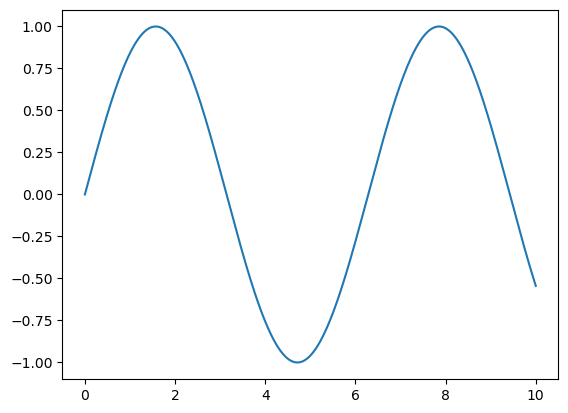

In [215]:
# Step 1
fig, ax = plt.subplots()   # Create a figure containing a single axes

# Step 2
x = np.linspace(0, 10, 1000)   # Create 1,000 evenly spaced numbers between 0 and 10
y = np.sin(x)                  # Compute the sine of each of these numbers

# Step 3
ax.plot(x, y)                  # Plot x and y


1. `fig, ax = plt.subplots() ` - This creates a figure object and an axes object. The figure object is the canvas that we will draw on, while the axes object is the plot itself.
2. Generate data we will plot
3. Use our data, and make a plot on our axis, `ax`, by calling the `ax.plot()` method.


Understanding the difference between the figure and axes object can be confusing at first. One way to think about them is to think about them as a framed picture. The `ax` object is the picture where we "draw" our plots, while the `fig` object is the frame. We can have multiple pictures on the same frame, or multiple frames with different pictures.

To see this, we can set the objects to different colours.

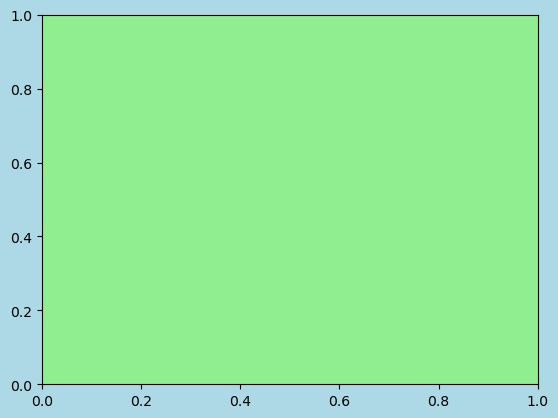

In [216]:
fig, ax = plt.subplots()   # Create a figure containing a single axes

fig.set_facecolor("lightblue")   # Set the background color of the figure to light blue
ax.set_facecolor("lightgreen")   # Set the background color of the axes to light green

As noted, this separation also means we can have multiple plots on the same figure.

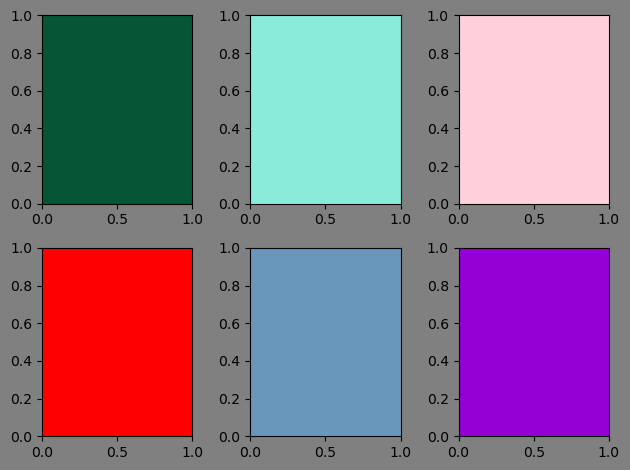

In [217]:
# First, specified the shape of the axes -- It means we will have two rows and three columns
# of axes on our figure
fig, axes = plt.subplots(2, 3)

fig.set_facecolor("gray")  # Set the background color of the figure to gray

# Choose hex colors for the axes
colours = ["#065535", "#89ecda", "#ffd1dc", "#ff0000", "#6897bb", "#9400d3"]

# axes is a numpy array and we want to iterate over a flat version of it
for (ax, c) in zip(axes.flat, colours): # loop through the axes and colours
    ax.set_facecolor(c)

fig.tight_layout() # Automatically adjust the positions of the axes to fit on the figure

### Different Plot Types
Matplotlib is very flexible and can be used to create a wide variety of plots. We will cover a few of the most common plot types here. See the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for more examples. These examples are taken from the Matplotlib gallery.

#### Bar Charts

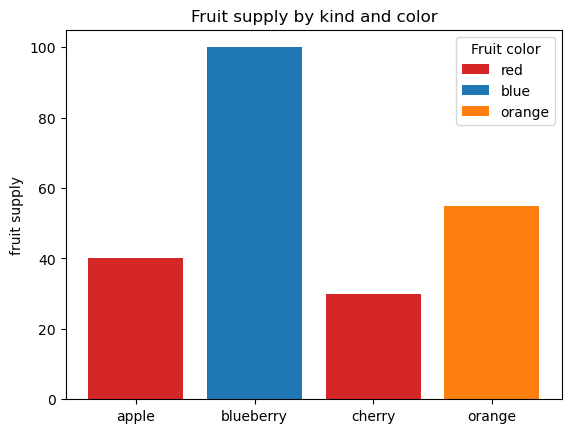

In [218]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

#### Scatter Plots and Annotation

Text(2.75, 5.1, 'Outlier')

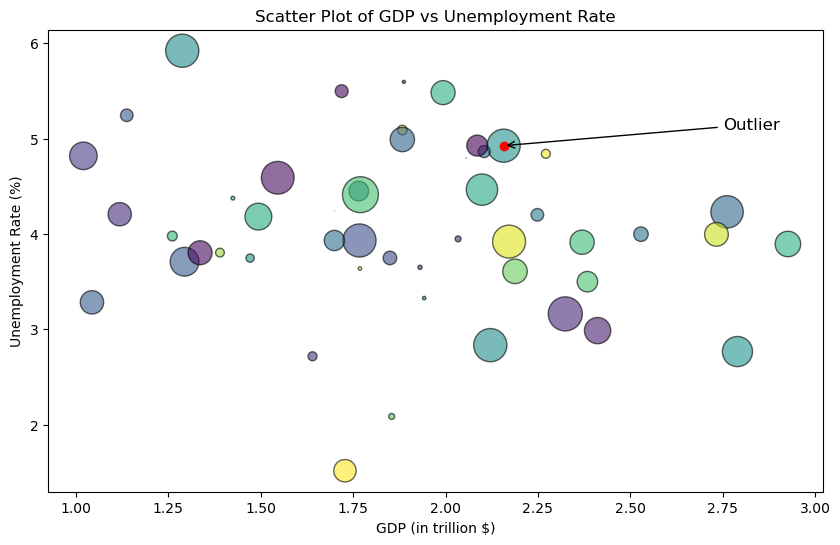

In [219]:
np.random.seed(42)
N = 50

# Example variables: GDP and Unemployment Rate
GDP = np.random.normal(2, 0.5, N)
unemployment_rate = np.random.normal(5, 1, N)
unemployment_rate += -0.5 * GDP
colours = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(GDP, unemployment_rate, s=area, c=colours, alpha=0.6, edgecolors='k')

# Add titles and labels
ax.set_title("Scatter Plot of GDP vs Unemployment Rate")
ax.set_xlabel("GDP (in trillion $)")
ax.set_ylabel("Unemployment Rate (%)")

# Add a point annotation
highlight_point = (GDP[17], unemployment_rate[17]) # Get the x and y coordinates of the point we want to highlight
ax.scatter(*highlight_point, color='red')
ax.annotate('Outlier', xy=highlight_point, xytext=(2.75, 5.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12)

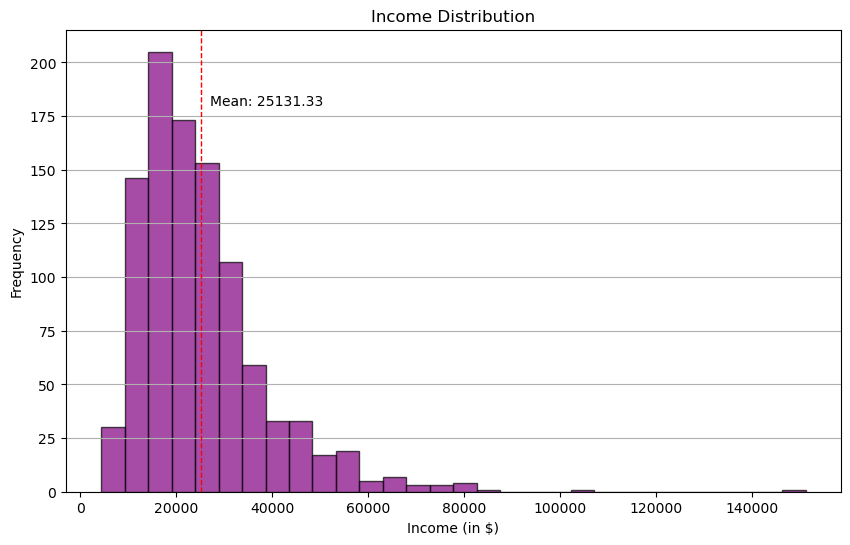

In [220]:
# Generate synthetic income data
# Assume incomes follow a log-normal distribution
np.random.seed(42)
income_data = np.random.lognormal(mean=10, sigma=0.5, size=1000)

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(income_data, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Add titles and labels
ax.set_title("Income Distribution")
ax.set_xlabel("Income (in $)")
ax.set_ylabel("Frequency")

# Add a vertical line for mean income
mean_income = np.mean(income_data)
ax.axvline(mean_income, color='red', linestyle='dashed', linewidth=1)

# Add a text label for the mean income
ax.text(mean_income+2000, 180, f'Mean: {mean_income:.2f}', rotation=0)

# Add grid
ax.grid(axis='y')

---

## Monte-Carlo Simulations

In this simulation, we will explore the power of OLS at different sample sizes. 

To do this we will bring together what we have covered so far, as well introduce defining functions and loops.

Recall that the structure of a typical Monte-Carlo simulation is:

1. Specify the "data generating process" (DGP). Thesea re the assumptions that we make about where the data come from and what their properties are
2. Choose a sample size $N$ for you MC simulation
3. Choose the number of times you will repeat your MC simulation.
4. Generate a random sample of size N based on your DGP
5. Using the random sample generated in (4), calculate the statistics of interest. These might be parameter estimates, statistics for tests of hypotheses involving these estimates, specification tests, or whatever. Save these. 
6. Go back to (4) and repeat (4)-(5) until you have done it 10,000 times.

We will define a couple of functions to make our code more readable. The first function will be our DGP, which will generate a dataset of size $N$ and return the data as a Pandas DataFrame. The second function will be our OLS function, which will take our $X$ and $y$ matrices and return the OLS estimates.

## Introduction to Functions

### What Are Functions?

In Python, a function is a reusable block of code designed to perform a specific task. The concept is rooted in mathematical functions \( f(x) \), where an input \( x \) is mapped to an output \( f(x) \).

### Why Use Functions?

1. **Modularity**: Functions encapsulate specific tasks, making it easier to manage large econometric models.
  
2. **Reusability**: Once defined, functions can be called multiple times with different data, reducing redundancy. This is particularly useful for bootstrapping, Monte Carlo simulations, and other iterative tasks.

3. **Readability**: Using functions enhances code readability, enabling more straightforward interpretation of econometric methods being employed.

4. **Debugging**: Isolated blocks of code are easier to troubleshoot than sprawling scripts, reducing the cost of error correction in stochastic simulations or complex econometric analyses.

#### How to Define and Use Functions

##### Defining a Function
In Python, a function is defined using the `def` keyword.

```python
def calculate_ols(y, X):
    # Code to perform OLS regression
    
```

Here, `calculate_ols` is the function name, and `y` and `X` are the parameters.

#### Calling a Function
Once defined, call the function by its name followed by parentheses enclosing any arguments.

```python
calculate_ols(y_data, X_data)
```

#### Return Statement
To extract values from a function, use the `return` statement.

```python
def calculate_ols(y, X):
    # Code to perform OLS regression
    return beta_hat
```

#### Key Points

1. **Parameter vs Argument**: Parameters are variables listed during function definition. Arguments are the values passed to the function when called.

2. **Scope**: Variables defined inside a function have local scope, making them inaccessible outside the function.

3. **Default Values**: Functions can have default parameter values, useful for setting typical econometric assumptions.



Let's now define our DGP function which will have the form:

$$
y_i = 3 + 2 X_{i} + \epsilon_i
$$
    
where $\epsilon_i \sim N(0, 2)$.

In [221]:
def generate_data(N=1000): 
    """
    Generates a dataset based on a simple linear regression model.
    
    Parameters:
    - N (int): The sample size. Default is 1000.
    
    Returns:
    - df (DataFrame): A Pandas DataFrame containing the variables X and y.
    """
    # Numpy has a module for generating random numbers under the subpackage random.
    X = np.random.normal(0, 1, N)       # Generate N random numbers from a normal distribution with mean 0 and standard deviation 1
    u = np.random.normal(0, 2, N)       # Generate N random numbers from a normal distribution with mean 0 and standard deviation 2
    y = 3 + 2 * X + u                   # Generate the dependent variable y
    df = pd.DataFrame({'X': X, 'y': y}) # Create a Pandas DataFrame with the variables X and y
    return df

Let's see what the output looks like

In [222]:
generate_data(5)

,X,y
0,1.399355,6.585682
1,0.924634,6.639654
2,0.059630,4.389604
3,-0.646937,3.805232
4,0.698223,3.325976


Now let's define our OLS function.

In [223]:
def ols(df):
    """
    Computes OLS estimates for a simple linear regression model.
    
    Parameters:
    - df (DataFrame): A Pandas DataFrame containing the dependent variable 'y' and independent variable 'X'.
    
    Returns:
    - β (ndarray): A NumPy array containing the OLS estimates for the intercept and slope [β_0, β_1].
    """
    X = df['X']
    X = np.column_stack((np.ones(len(X)), X))  # Adding a constant term for intercept
    y = df['y']
    
    β = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return β

#### Running the Simulation
Now let's proceed with running the Monte Carlo simulation. We'll examine the power of OLS at sample sizes 
`N=[5, 30,100,500]` and repeat the simulation 1,000 times for each sample size.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


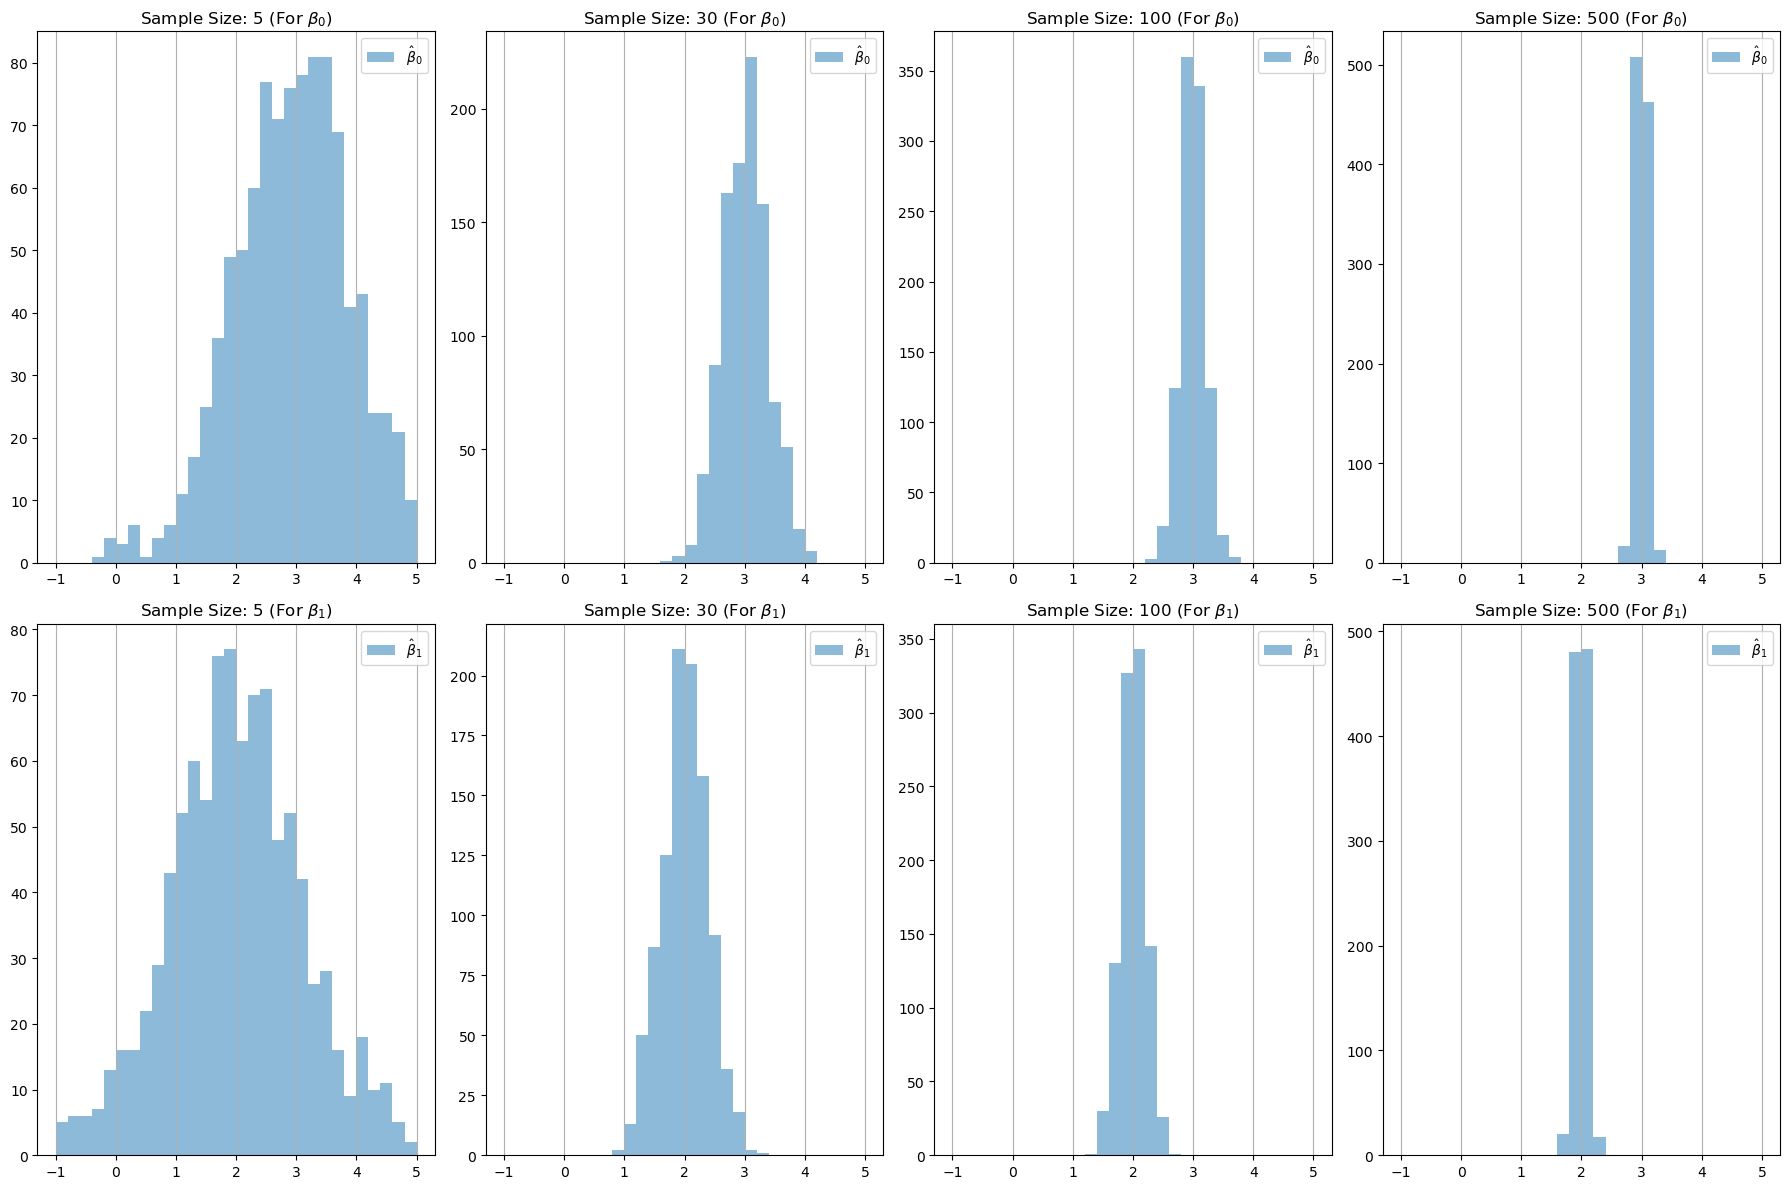

In [224]:
sample_sizes = [5, 30, 100, 500] # Create a list of sample sizes
n_simulations = 1_000           # Number of Monte Carlo simulations
results = {}                   # Create an empty dictionary to store the results

# Create subplots
fig, axs = plt.subplots(2, len(sample_sizes), figsize=(18, 12)) # Create a figure containing 2 rows and 4 columns of axes

for idx, N in enumerate(sample_sizes): # Loop through the sample sizes
    # enumerate creates a tuple with the index (idx) and the value (N) of the element

    # Create empty lists to store the estimates
    beta_0_estimates = []
    beta_1_estimates = []
    
    for _ in range(n_simulations): # Here we start the main Monte Carlo loop

        # Generate the data
        df = generate_data(N)

        # Compute the OLS estimates
        beta_hat = ols(df)

        # Store the estimates using the append method
        beta_0_estimates.append(beta_hat[0])
        beta_1_estimates.append(beta_hat[1])
    
    # Store the results for each N
    results[N] = {'beta_0': beta_0_estimates, 'beta_1': beta_1_estimates}
    
    axs[0, idx].hist(results[N]['beta_0'], bins=30, alpha=0.5, label='$\\hat{\\beta}_0$', range=(-1, 5)) # Plot the histogram of the estimates
    axs[0, idx].set_title(f"Sample Size: {N} (For $\\beta_0$)") # Add a title
    axs[0, idx].grid(axis='x')  # Add a grid
    axs[0, idx].legend()       # Add a legend

    axs[1, idx].hist(results[N]['beta_1'], bins=30, alpha=0.5, label='$\\hat{\\beta}_1$', range=(-1, 5))
    axs[1, idx].set_title(f"Sample Size: {N} (For $\\beta_1$)")
    axs[1, idx].grid(axis='x') 
    axs[1, idx].legend()

plt.tight_layout()
plt.show()